In [2]:
import pandas as pd
import sys
from sklearn import datasets
import numpy as np

data = pd.read_csv('data.csv')

column_dict = {
    "What year are you in?": "current_year",
    "What faculty are you in?": "faculty", 
    "What was your high school average when you applied to the University of Waterloo?": "hs_average",
    "What is your nationality status?": "nationality_status",
    "What is the highest education level your parents have completed?  [Parent 1]": "parent1_education",
    "What is the highest education level your parents have completed?  [Parent 2]": "parent2_education",
    "On average, how much time do you spend per week participating in social activities during an academic term? (i.e. extracurricular activities, movies, eating out, bars, parties, hanging out, etc.)": "social_time",
    "On average, what percentage of classes do you feel that you attend during an academic term? ": "class_attendance",
    "On average, excluding studying, how much time do you spend looking at a screen, during an academic term? (i.e. Phone, Laptop, TV, etc) ": "screen_time",
    "On average, how much sleep do you get per night during an academic term? ": "sleep_time",
    "On average, how many days do you exercise each week during an academic term?": "excercise_time",
    "On average, how much time do you spend doing school work / studying on a given day during an academic term?": "school_work_time",
    "In relation to school work, how much time do you spend on coop preparation during an academic term? (ie. applications. interview prep. practice, interviews, etc)": "coop_time",
    "Is it a high priority for you to achieve an 80%+ average": "academic_priority",
    'What is your current cumulative average?': "current_average"
}
nationality_dict = {
    'International (You are not a Canadian Citizen and are here on a Visa)':'Internationl',
    '1st Generation Canadian Citizen (You were not born in Canada and You are a Canadian Citizen)':'1st_Gen',
    '2nd+ Generation Canadian Citizen (You were born in Canada and you are a Canadian Citizen)':'2nd+_Gen'
}
sleep_dict = {
    "Not enough (I'm always tired)":"Not Enough",
    "Enough (I'm rested most of the time)":"Enough",
    "More than enough (I'm always well rested)":"More than Enough"
}
screen_dict = {
    'Regularly, but not a significant amount':'Regularly',
    "I'm almost always looking at a screen":'Almost Always',
    'A significant amount':'A significant amount',
    'Almost never':'Almost never'
}
coop_dict = {
    'Almost none':'Almost none',
    'About the same if not more as school work':"Same or More",
    'A significant amount but still less than school work':'Significant,but less than school',
    'A lot less than school work':'A lot less than school work' 
}
social_dict = {
    'Once or twice a week':'Once/Twice Weekly',
    'Multiple days a week':'Multiple Weekly',
    'Rarely':'Rarely'
}
data = data.rename(index=str,columns = column_dict)
for i in range(0,12):
    data.faculty[i] ='Engineering'
    
data = data.drop(["Enter your email address OR phone number if you'd like to be entered for a chance to win 1 of 4 $20 amazon gift cards", "Timestamp", "faculty"], axis=1)
data.nationality_status = data.nationality_status.map(nationality_dict)
data.sleep_time = data.sleep_time.map(sleep_dict)
data.social_time = data.social_time.map(social_dict)
data.coop_time = data.coop_time.map(coop_dict)
data.screen_time = data.screen_time.map(screen_dict)

# bin data values to numerical points (0,1,2,3,4)

data['sleep_time'] = np.where(data.sleep_time == 'Not Enough', 0, data.sleep_time)
data['sleep_time'] = np.where(data.sleep_time == 'Enough', 1, data.sleep_time)
data['sleep_time'] = np.where(data.sleep_time == 'More than Enough', 2, data.sleep_time)

data['screen_time'] = np.where(data.screen_time == 'Almost never', 0, data.screen_time)
data['screen_time'] = np.where(data.screen_time == 'Regularly', 1, data.screen_time)
data['screen_time'] = np.where(data.screen_time == 'A significant amount', 2, data.screen_time)
data['screen_time'] = np.where(data.screen_time == 'Almost Always', 2, data.screen_time)

data['social_time'] = np.where(data.social_time == 'Rarely', 0, data.social_time)
data['social_time'] = np.where(data.social_time == 'Once/Twice Weekly', 1, data.social_time)
data['social_time'] = np.where(data.social_time == 'Multiple Weekly', 2, data.social_time)

data['current_average'] = np.where(data.current_average == 'Prefer not to say', 0, data.current_average)
data['current_average'] = np.where(data.current_average == '60-64%', 1, data.current_average)
data['current_average'] = np.where(data.current_average == '65-69%', 2, data.current_average)
data['current_average'] = np.where(data.current_average == '70-74%', 3, data.current_average)
data['current_average'] = np.where(data.current_average == '75-79%', 4, data.current_average)
data['current_average'] = np.where(data.current_average == '75-79%', 5, data.current_average)
data['current_average'] = np.where(data.current_average == '80-84%', 6, data.current_average)
data['current_average'] = np.where(data.current_average == '85-89%', 7, data.current_average)
data['current_average'] = np.where(data.current_average == '90-94%', 8, data.current_average)
data['current_average'] = np.where(data.current_average == '95-100%', 9, data.current_average)

print(data)



/Users/drop/delphi/delphi/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     current_year hs_average nationality_status          parent1_education  \
0               3     85-89%           2nd+_Gen              Undergraduate   
1               3     90-94%           2nd+_Gen              Undergraduate   
2               3     85-89%           2nd+_Gen              Undergraduate   
3               3     90-94%            1st_Gen                    College   
4               3     85-89%            1st_Gen              Post-Graduate   
5               3     85-89%            1st_Gen              Undergraduate   
6               3     80-84%           2nd+_Gen              Undergraduate   
7               3     90-94%            1st_Gen              Undergraduate   
8               3     85-89%           2nd+_Gen                    College   
9               3     90-94%            1st_Gen              Post-Graduate   
10              3     90-94%           2nd+_Gen              Undergraduate   
11              3     90-94%           2nd+_Gen              Pos

     current_year hs_average nationality_status          parent1_education  \
0               3     85-89%           2nd+_Gen              Undergraduate   
1               3     90-94%           2nd+_Gen              Undergraduate   
2               3     85-89%           2nd+_Gen              Undergraduate   
3               3     90-94%            1st_Gen                    College   
4               3     85-89%            1st_Gen              Post-Graduate   
5               3     85-89%            1st_Gen              Undergraduate   
6               3     80-84%           2nd+_Gen              Undergraduate   
7               3     90-94%            1st_Gen              Undergraduate   
8               3     85-89%           2nd+_Gen                    College   
9               3     90-94%            1st_Gen              Post-Graduate   
10              3     90-94%           2nd+_Gen              Undergraduate   
11              3     90-94%           2nd+_Gen              Pos

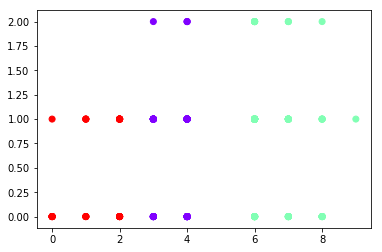

In [5]:
# UNSUPERVISED LEARNING - K MEANS CLUSTERING

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

feature_labels = ['current_average','sleep_time', 'screen_time', 'social_time']

temp_data = data[feature_labels]

# Declaring Model
model = KMeans(n_clusters=3)

model.fit(temp_data)

# print clusters
print(model.cluster_centers_)  

# print labels
print(model.labels_)  

# scatter
plt.scatter(temp_data['current_average'],temp_data['sleep_time'], c=model.labels_, cmap='rainbow')  
plt.show()


#Plot the clusters obtained using k means
# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(temp_data['social_time'], temp_data['social_time'],
#                      c=kmeans[0],s=50)

# ax.set_title('K-Means Clustering')
# ax.set_xlabel('Cummulative GPA')
# ax.set_ylabel('Social Time')
# plt.colorbar(scatter)

In [4]:
from scipy import stats

#Make a copy of DF
df_copy = temp_data

#Transsform the timeOfDay to dummies
df_copy = pd.get_dummies(df_copy, columns=['current_average'])
print(df_copy)

# #Standardize
clmns = ['sleep_time', 'screen_time', 'social_time']
print(clmns)
df_tr_std = stats.zscore(df_copy[clmns])

# #Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

# #Glue back to originaal data
df_copy['clusters'] = labels

# #Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print (df_copy[clmns].groupby(['clusters']).mean())

    current_average sleep_time screen_time social_time
0                 3          1           1           1
1                 3          1           1           0
2                 3          1           1           1
3                 6          0           2           0
4                 4          1           2           1
5                 4          0           2           1
6                 2          1           2           1
7                 6          0           2           2
8                 7          1           2           1
9                 7          0           2           1
10                6          0           2           2
11                6          1           2           1
12                6          1           2           2
13                4          1           2           1
14                7          1           2           1
15                3          1           2           2
16                3          1           2           2
17        

AttributeError: 'float' object has no attribute 'sqrt'